tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


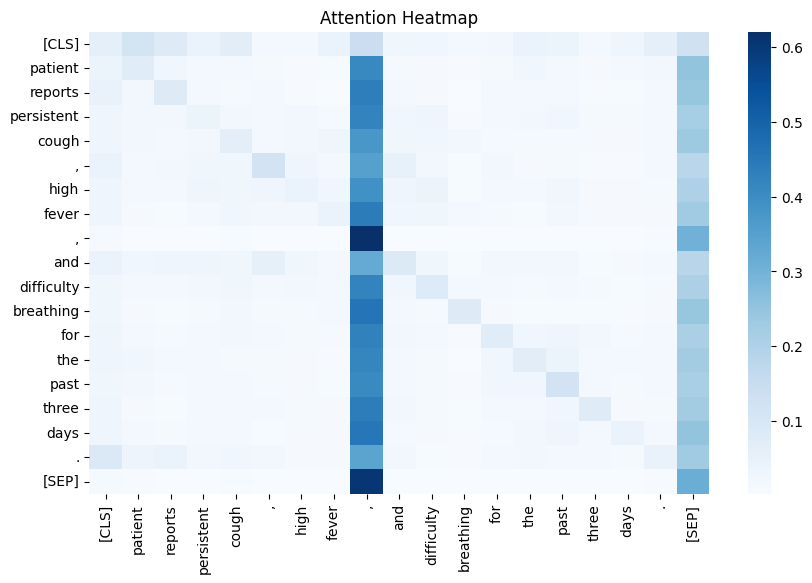

In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel

# Load the BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Prepare the medical note
medical_note = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."

# Tokenize the input
inputs = tokenizer(medical_note, return_tensors="pt", truncation=True, padding=True)

# Model inference
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions

# Extract the last layer attention
last_layer_attention = attentions[-1][0].mean(dim=0).numpy()

# Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(last_layer_attention, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=False)
plt.title("Attention Heatmap")
plt.show()
